In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('emotion_sentimen_dataset.csv')
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [3]:
df['Emotion'].value_counts()


Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

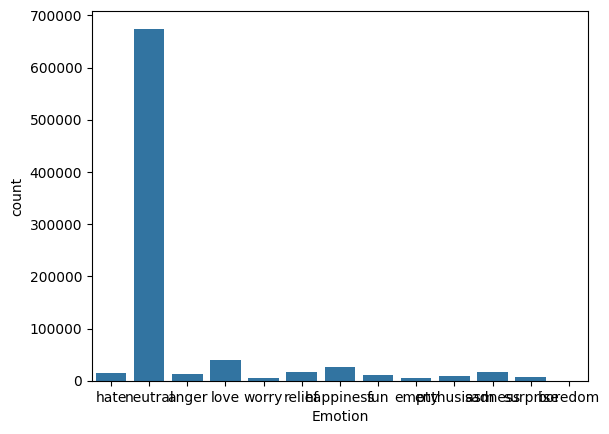

In [4]:
sns.countplot(x='Emotion',data=df)
plt.show()

In [5]:
import neattext as nfx
df['Clean_text'] = df['text'].apply(nfx.remove_userhandles)

In [6]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [7]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_hashtags)


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,text,Emotion,Clean_text
0,i seriously hate one subject to death but now ...,hate,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,neutral,im life feel appalled
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,anger,ive angry r feel like idiot trusting place
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious outside like rapture happened
...,...,...,...
839550,i feel like telling these horny devils to find...,neutral,feel like telling horny devils find site suite...
839551,i began to realize that when i was feeling agi...,neutral,began realize feeling agitated restless though...
839552,i feel very curious be why previous early dawn...,neutral,feel curious previous early dawn time seek tro...
839553,i feel that becuase of the tyranical nature of...,neutral,feel becuase tyranical nature government el sa...


In [9]:
emotion_counts = df['Emotion'].value_counts()

sampled_dfs = []

for emotion, count in emotion_counts.items():
    if count > 10000:
        sampled_df = df[df['Emotion'] == emotion].sample(n=10000, random_state=22)
    else:
        sampled_df = df[df['Emotion'] == emotion]
    
    sampled_dfs.append(sampled_df)

df_reduced = pd.concat(sampled_dfs).reset_index(drop=True)
df_reduced['Emotion'].value_counts()

Emotion
neutral       10000
love          10000
happiness     10000
sadness       10000
relief        10000
hate          10000
anger         10000
fun           10000
enthusiasm     9304
surprise       6954
empty          5542
worry          4475
boredom         126
Name: count, dtype: int64

In [10]:
x=df_reduced['Clean_text']
y=df_reduced['Emotion']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier


In [16]:
def accuracy_score(model):
     y_pred = model.predict(x_test)
     accuracy = metrics.accuracy_score(y_test, y_pred)
     print(f"Accuracy: {accuracy:.2f}")
     
     cm = metrics.confusion_matrix(y_test, y_pred,labels=y_test.unique())
    
     plt.figure(figsize=(8, 6))
     sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
     plt.xlabel('Predicted')
     plt.ylabel('True')
     plt.title('Confusion Matrix')
     plt.show()

In [13]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

e:\Projects\projectenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9538861564487328

Accuracy: 0.95


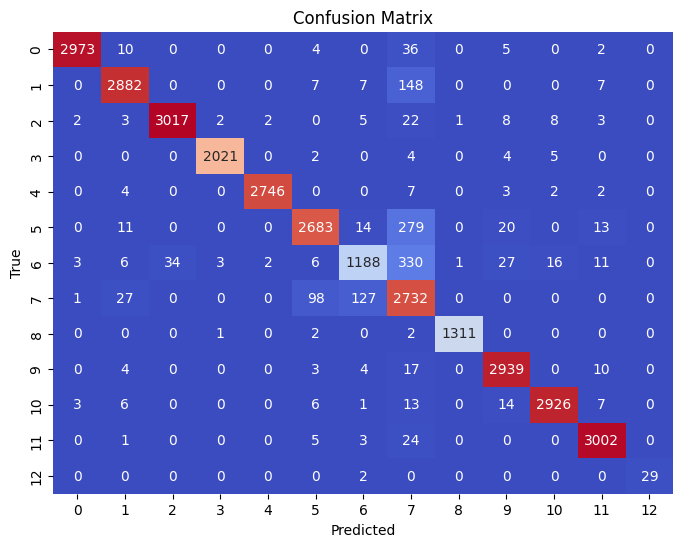

In [17]:
accuracy_score(pipe_lr)

Accuracy: 0.96


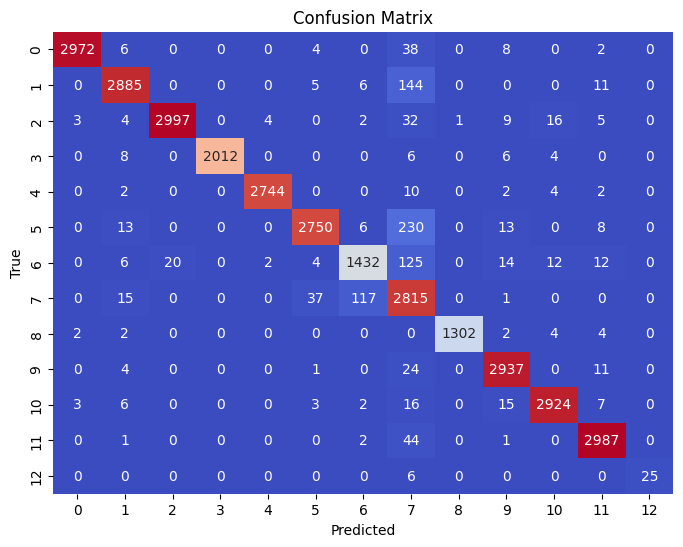

In [18]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel='rbf',C=10))])
pipe_svm.fit(x_train,y_train)
accuracy_score(pipe_svm)

In [19]:
import pickle
pickle.dump(pipe_svm,open('svc.pkl','wb'))